# Part B

In [1]:
library(ggplot2)
library(dplyr)
library(repr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
set.seed(1)

In [3]:
x=rnorm(n = 1000000,mean = 80,sd = 10)


In [4]:
y=x+rnorm(n = 1000000,mean = 40,sd = 5)

In [5]:
round(cov(x = x,y = y),2)

[1] 100.08

here,covariance value is  high possitive number.so we can say if we increase x,y will be increase becorse those are high linear possitive relationship

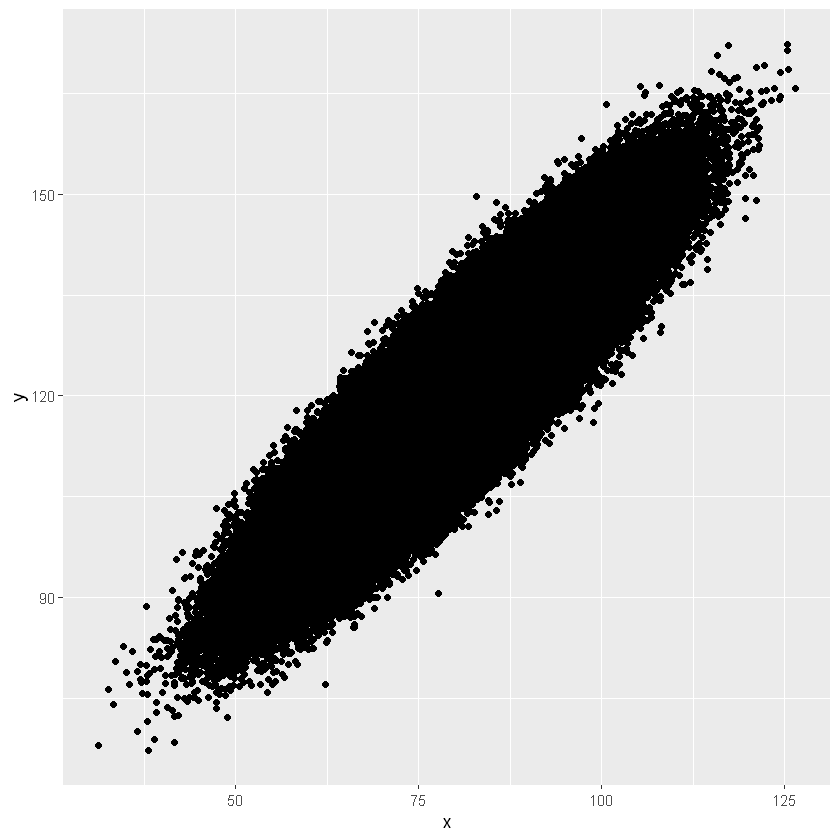

In [6]:
ggplot(mapping = aes(x = x,y = y),alpha=0.005)+geom_point()

<font size=4>Here,x and y are higher possitive linear relationship.when x is increased, y should be incresed</font>

# Part C

In [7]:
library(ggplot2)
library(dplyr)

In [8]:
data('midwest')
head(midwest,5)
colnames(x = midwest)

PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
561,ADAMS,IL,0.052,66090,1270.9615,63917,1702,98,249,...,19.63139,4.355859,63628,96.27478,13.151443,18.01172,11.009776,12.443812,0,AAR
562,ALEXANDER,IL,0.014,10626,759.0000,7054,3496,19,48,...,11.24331,2.870315,10529,99.08714,32.244278,45.82651,27.385647,25.228976,0,LHR
563,BOND,IL,0.022,14991,681.4091,14477,429,35,16,...,17.03382,4.488572,14235,94.95697,12.068844,14.03606,10.852090,12.697410,0,AAR
564,BOONE,IL,0.017,30806,1812.1176,29344,127,46,150,...,17.27895,4.197800,30337,98.47757,7.209019,11.17954,5.536013,6.217047,1,ALU
565,BROWN,IL,0.018,5836,324.2222,5264,547,14,5,...,14.47600,3.367680,4815,82.50514,13.520249,13.02289,11.143211,19.200000,0,AAR


[1] "PID"                  "county"               "state"               
 [4] "area"                 "poptotal"             "popdensity"          
 [7] "popwhite"             "popblack"             "popamerindian"       
[10] "popasian"             "popother"             "percwhite"           
[13] "percblack"            "percamerindan"        "percasian"           
[16] "percother"            "popadults"            "perchsd"             
[19] "percollege"           "percprof"             "poppovertyknown"     
[22] "percpovertyknown"     "percbelowpoverty"     "percchildbelowpovert"
[25] "percadultpoverty"     "percelderlypoverty"   "inmetro"             
[28] "category"

In [9]:
df=select(midwest,percasian,percother,perchsd,percollege,percprof)
head(df)

percasian,percother,perchsd,percollege,percprof
0.37675897,0.18762294,75.10740,19.63139,4.355859
0.45172219,0.08469791,59.72635,11.24331,2.870315
0.10673071,0.22680275,69.33499,17.03382,4.488572
0.48691813,3.69733169,75.47219,17.27895,4.197800
0.08567512,0.10281014,68.86152,14.47600,3.367680
0.54640215,0.61925577,76.62941,18.90462,3.275891


In [10]:
cor_mat=cor(df)
cor_mat

,percasian,percother,perchsd,percollege,percprof
percasian,1.0000000,0.3092782,0.4735671,0.7519103,0.7933508
percother,0.3092782,1.0000000,0.2140580,0.2416792,0.1966477
perchsd,0.4735671,0.2140580,1.0000000,0.7769244,0.6295372
percollege,0.7519103,0.2416792,0.7769244,1.0000000,0.8874784
percprof,0.7933508,0.1966477,0.6295372,0.8874784,1.0000000


In [11]:
get_upper_tri = function(matrix){
    #Assign Null values to mirror image of matrix
    matrix[upper.tri(matrix)] = NA
    return(matrix)
  }

cor_mat = get_upper_tri(cor_mat)
cor_mat

,percasian,percother,perchsd,percollege,percprof
percasian,1.0000000,NA,NA,NA,NA
percother,0.3092782,1.0000000,NA,NA,NA
perchsd,0.4735671,0.2140580,1.0000000,NA,NA
percollege,0.7519103,0.2416792,0.7769244,1.0000000,NA
percprof,0.7933508,0.1966477,0.6295372,0.8874784,1


In [12]:
library(reshape2)
melted_cor_mat = melt(round(cor_mat,2), na.rm = TRUE)
head(melted_cor_mat, 6)

,Var1,Var2,value
1,percasian,percasian,1.00
2,percother,percasian,0.31
3,perchsd,percasian,0.47
4,percollege,percasian,0.75
5,percprof,percasian,0.79
7,percother,percother,1.00


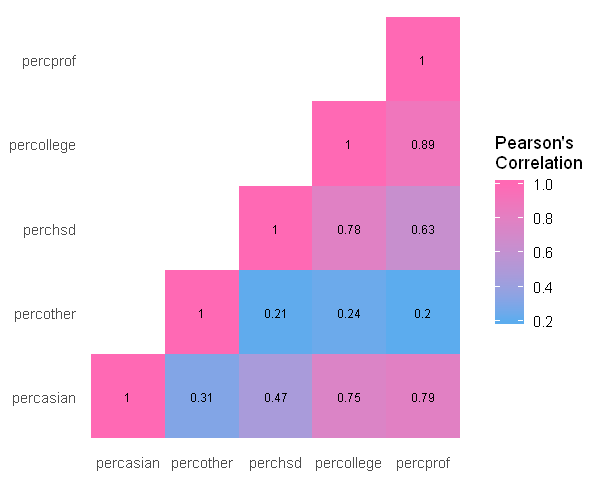

In [13]:
options(repr.plot.width = 5, repr.plot.height = 4)
ggplot(data = melted_cor_mat, aes(Var1, Var2, fill = value)) + 
geom_tile() + 
scale_fill_gradientn(colours = c("steelblue2", "hotpink"), name = "Pearson's\nCorrelation") + 
theme_minimal() + 
geom_text(aes(Var1, Var2, label = value), color = "black", size = 2.5) +
theme(
  axis.title.x = element_blank(),
  axis.title.y = element_blank(),
  panel.grid.major = element_blank(),
  panel.border = element_blank(),
  panel.background = element_blank(),
  axis.ticks = element_blank())